# Unsupervised Learning with K Mean Clustering

Supervised learning has features(X) and labels(target-y). But in unsupervised learning doesn't have y to predict.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


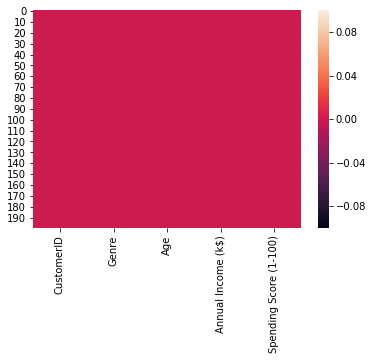

In [5]:
sns.heatmap(df.isnull())

In [6]:
X = df.iloc[:,[3,4]] # dropped customerid, gender,age.

In [7]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# elbow method to find optimal number of cluster

In [8]:
x_arr = X.values

In [9]:
x_arr.shape

(200, 2)

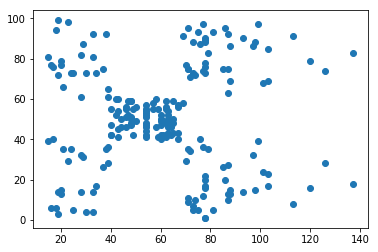

In [10]:
plt.scatter(x_arr[:,0],x_arr[:,1])

In [11]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=1)

In [27]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# within cluster sum of square (WCSS)

In [28]:
km.inertia_ # value of wcss - within cluster sum of square

269981.28

In [29]:
km = KMeans(n_clusters=2) # incerase n_clusters will reduce the value of wcss.

In [30]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
km.inertia_

181363.59595959596

In [23]:
km = KMeans(n_clusters=200) # k = n_cluster where here k= number of rows in this case value of wcss will be 0

In [24]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
km.inertia_

0.0

In [38]:
wcss=[]
for i in range(1,41):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [39]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30566.451130251862,
 24986.52564064288,
 21913.929201194416,
 19664.685196005543,
 17518.643456567686,
 15802.696051417428,
 14263.013848913848,
 12762.123258848995,
 11756.066680782986,
 10980.608644374948,
 10209.772378863825,
 9442.469889162563,
 8554.285099649805,
 8122.021990874622,
 7809.037252450068,
 7223.901807330098,
 6828.488755353693,
 6313.605534150419,
 6160.115901934323,
 5718.5106442577035,
 5551.1636535033595,
 5225.750897170463,
 4840.871583971584,
 4822.123399630984,
 4439.29892884893,
 4103.129412254412,
 4115.7552308802315,
 4069.1294067044073,
 3695.7554223554225,
 3548.9296536796537,
 3339.5691919191922,
 3127.9910173160174,
 2977.5931818181816,
 2801.459632034632]

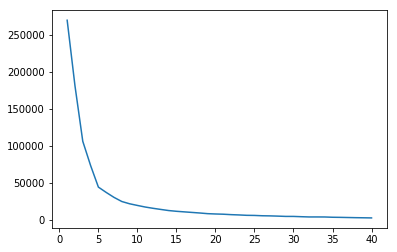

In [40]:
plt.plot(range(1,41),wcss) #take there elbow point as right number of cluster
#because there is huge drop  from between 0 to 5 and after 5 the drop is minimal.

In [42]:
km = KMeans(n_clusters=5) # KMeans(n_clusters=5, init='k-means++')
y =km.fit_predict(X) #will predict cluster from 0 to 4 as we have found that right number of cluster is 5.
# 0 - Cluster 1
# 1 - Cluster 2... so on
# 4 - Cluster 5

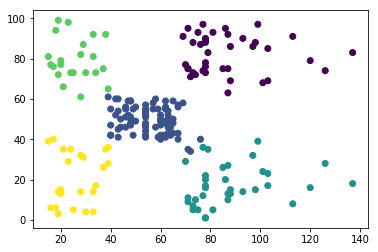

In [43]:
plt.scatter(x_arr[:,0],x_arr[:,1],c=y)

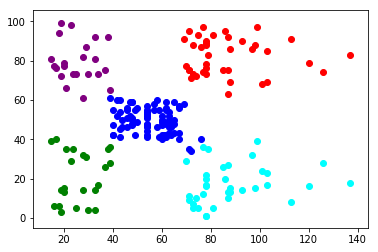

In [46]:
plt.scatter(x_arr[y==0,0],x_arr[y==0,1],color='red')
plt.scatter(x_arr[y==1,0],x_arr[y==1,1],color='blue')
plt.scatter(x_arr[y==2,0],x_arr[y==2,1],color='cyan')
plt.scatter(x_arr[y==3,0],x_arr[y==3,1],color='purple')
plt.scatter(x_arr[y==4,0],x_arr[y==4,1],color='green')

In [47]:
dict1 = {0:"HI, HS",1:"MI, MS",2:"HI, LS",3:"LI, HS",4:"LI, LS"}

In [48]:
dict1

{0: 'HI, HS', 1: 'MI, MS', 2: 'HI, LS', 3: 'LI, HS', 4: 'LI, LS'}

In [51]:
X['Cluster']=y[:]

C:\Users\Chintan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [53]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [54]:
X['Cluster']=X['Cluster'].map(dict1)

C:\Users\Chintan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
X

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,"LI, LS"
1,15,81,"LI, HS"
2,16,6,"LI, LS"
3,16,77,"LI, HS"
4,17,40,"LI, LS"
5,17,76,"LI, HS"
6,18,6,"LI, LS"
7,18,94,"LI, HS"
8,19,3,"LI, LS"
9,19,72,"LI, HS"


In [57]:
X['Cluster'].value_counts()

MI, MS    81
HI, HS    39
HI, LS    35
LI, LS    23
LI, HS    22
Name: Cluster, dtype: int64

# kmean++ given in presentation